In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [3]:
!cp -r {path} /content/dataset

In [4]:
!ls

dataset  sample_data


In [5]:
!ls dataset

'IMDB Dataset.csv'


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/dataset/IMDB Dataset.csv')

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [11]:
df['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


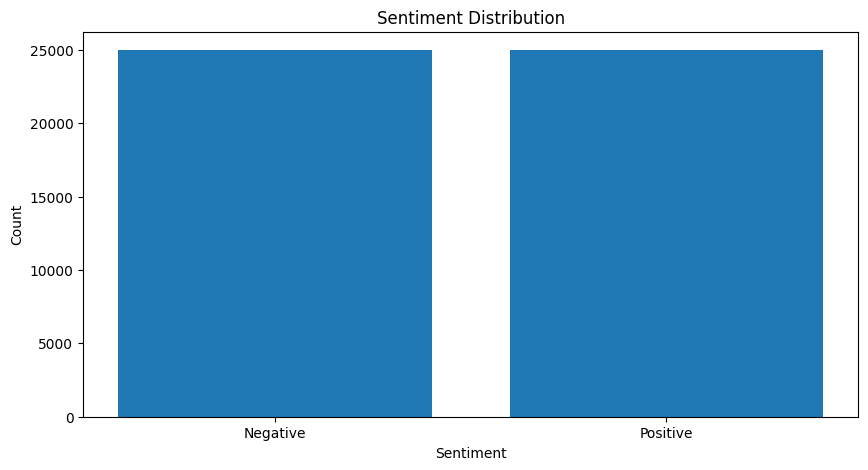

In [12]:
labels = ["Negative", "Positive"]

plt.figure(figsize=(10,5))
plt.bar(labels, df['sentiment'].value_counts())
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

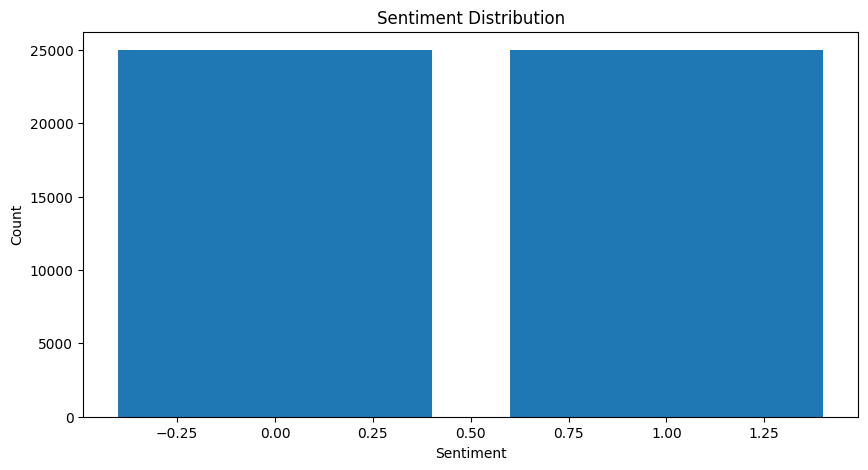

In [13]:
plt.figure(figsize=(10,5))
plt.bar(df['sentiment'].unique(), df['sentiment'].value_counts())
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

In [14]:
#remove html tags

import re

def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [15]:
df['review'] = df['review'].apply(remove_html_tags)

In [16]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [17]:
#remove numbers

def remove_numbers(text):
    pattern = r'[^a-zA-Z]'
    return re.sub(pattern, ' ', text)

In [18]:
df['review'] = df['review'].apply(remove_numbers)

In [19]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there s a family where a little boy ...,0
4,Petter Mattei s Love in the Time of Money is...,1


In [20]:
#remove punctuations

def remove_punctuations(text):
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)


In [21]:
df['review'] = df['review'].apply(remove_punctuations)

In [22]:
df['review'] = df['review'].apply(lambda x: x.lower())

In [23]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is...,1


In [24]:
df.shape

(50000, 2)

In [25]:
#spelling correction

from textblob import TextBlob

def correct_text(text):
  return str(TextBlob(text).correct())

In [26]:
df['review'][0]

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [28]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is...,1


In [29]:
#word tokenize
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [30]:
from nltk.tokenize import word_tokenize

df['review'] = df['review'].apply(word_tokenize)

In [31]:
df.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",1
1,"[a, wonderful, little, production, the, filmin...",1
2,"[i, thought, this, was, a, wonderful, way, to,...",1
3,"[basically, there, s, a, family, where, a, lit...",0
4,"[petter, mattei, s, love, in, the, time, of, m...",1


In [32]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    filtered_words = [word for word in text if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [33]:
df['review'] = df['review'].apply(remove_stopwords)

In [34]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [35]:
df['review'].apply(lambda x: len(x.split())).describe()

,review
count,50000.000000
mean,118.119980
std,89.383593
min,3.000000
25%,63.000000
50%,88.000000
75%,144.000000
max,1416.000000


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test["review"]), maxlen=200)

In [40]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  657, 1997,   32, 1737, 1865, 4150,  653,
       4653,  120,   18,  636,   25,    3, 1844,   26,   41,  972, 2198,
       1035,  330,  418,  763,  281,   59, 2808, 4187, 2770,  114,   13,
         44, 2972,  126,  309,   96, 4755,   10,    3,   14,  244,    2,
         96,  190, 1695,   38,  295, 1528,  440,  301,  259,   39,   37,
        247,  243, 1016,  339,  110,  862, 3993,   75,  315,  555,  483,
        127,   34,  701,  113,  305,  246,    6, 3566,  164,   62, 1549,
         87,  585, 1781, 1050, 2712, 3541, 1529,  121,  100,  207,  921,
       2665, 3844,    1,  845,  365,  349, 2443,  136,   15,   32,   32,
        553, 1207,  119, 4188,  102,  994, 4210, 2151,  320,  486,  577,
       2788, 1122, 3440,   59, 1356, 1089, 1462,  7

In [41]:
Y_train = train["sentiment"]
Y_test = test["sentiment"]

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Embedding,LSTM
from keras.models import Sequential

In [43]:
model = Sequential()

model.add(Embedding(
    input_dim=5000,        # Vocabulary size (top 5000 most frequent words)
    output_dim=128,        # Each word converted into 128-dimensional dense vector
    input_length=200       # Each input review is padded/truncated to 200 words
))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
history = model.fit(X_train,Y_train,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 182s 727ms/step - accuracy: 0.8594 - loss: 0.3370 - val_accuracy: 0.8681 - val_loss: 0.3271
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 172s 689ms/step - accuracy: 0.8954 - loss: 0.2743 - val_accuracy: 0.8731 - val_loss: 0.3058
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 173s 692ms/step - accuracy: 0.9092 - loss: 0.2349 - val_accuracy: 0.8709 - val_loss: 0.3199
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 175s 697ms/step - accuracy: 0.9219 - loss: 0.2045 - val_accuracy: 0.8735 - val_loss: 0.3356
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 169s 675ms/step - accuracy: 0.9285 - loss: 0.1914 - val_accuracy: 0.8680 - val_loss: 0.3429


In [48]:
loss,acc = model.evaluate(X_test,Y_test)
print("Test Accuracy: ", acc)
print("Test Loss",loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.8720 - loss: 0.3256
Test Accuracy:  0.8741000294685364
Test Loss 0.3267621397972107


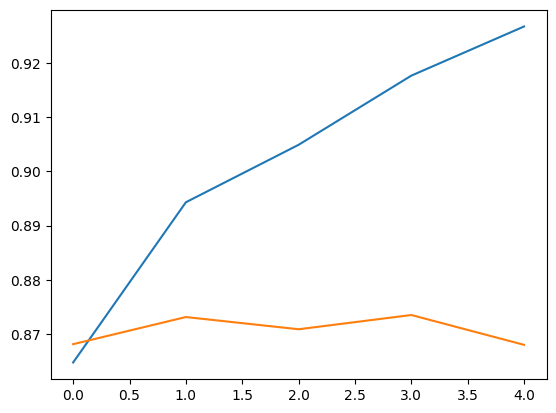

In [49]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.show()

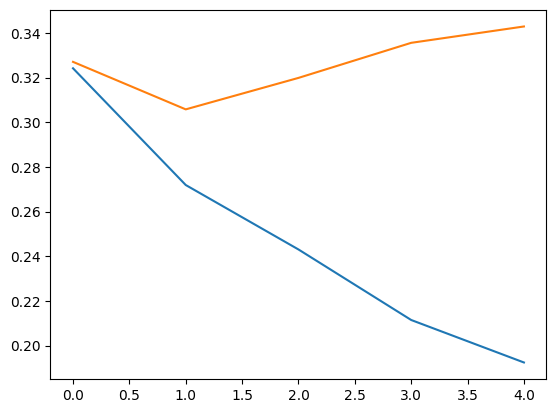

In [50]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.show()

#Prediction

In [51]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])  #text to numbers
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [52]:
review = 'The Movie Is excellent'

sentiment = predict_sentiment(review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
The sentiment of the review is: positive


In [53]:
review = 'The movie is OK but not good'

sentiment = predict_sentiment(review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
The sentiment of the review is: negative
